# Random Forest Valle del Cauca

In [13]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [15]:
path = 'dataset/datasetFinalTesisValle_NCauca.csv'
data = pd.read_csv(path)


Si se desea correr para 

76 => Valle del Cauca 

19 => Cauca

ó para todos quitar la condicion




In [16]:
df = data.loc[data['cod_dpto'] == 76].dropna(subset=['clasificacion_letter'])
#df = data.dropna(subset=['clasificacion_letter'])

In [17]:
print(df.head(3))

label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['clasificacion_letter_numeric'] = df['clasificacion_letter'].map(label_mapping)

   cod_dpto  cod_mpio  cod_clase  cod_barrio  cod_vereda  cod_corregimiento  \
1        76     76109          3           0         218                  0   
2        76     76109          1      200256           0                  0   
3        76     76130          3           0           0                  8   

   cod_comuna  tot_viviendas  tot_hogares  tip_vivienda  ...  ind_estudia  \
1          99              0            1             1  ...            9   
2          99              0            1             1  ...            9   
3          99              0            1             1  ...            9   

   clasificacion_letter  sum_gastos  sum_ingresos  ide_ficha_origen_hogar  \
1                     A       80000             0  76109709887100001014-1   
2                     A           0             0  76109715785400001775-1   
3                     B      270000             0  76130612759600003331-1   

   max_nivel_educativo_en_hogar  alguien_hogar_empleado_o_similar

# Normalizar Columnas no Categoricas

In [18]:
X = df[
    ['edad_calculada','cod_dpto', 'cod_mpio', 'cod_clase', 'cod_barrio', 'cod_vereda', 'cod_corregimiento', 'cod_comuna', 'tip_vivienda',
     'tip_mat_paredes', 'tip_mat_pisos', 'ind_tiene_energia', 'ind_tiene_gas', 'num_cuartos_exclusivos',
     'num_cuartos_unicos_dormir', 'tip_sanitario', 'tip_uso_sanitario', 'tip_origen_agua', 'tip_uso_agua_beber',
     'ind_tiene_cocina', 'tip_prepara_alimentos', 'tip_uso_cocina', 'tip_energia_cocina',
      'num_personas_hogar', 'num_habita_vivienda', 'ind_tiene_internet', 'ind_evento_avalancha','ind_evento_inundacion',
     'max_nivel_educativo_en_hogar', 'alguien_hogar_empleado_o_similar', 'alguien_hogar_cotiza_pension',
     'sum_ingresos_hogar', 'sum_gastos_hogar']]
y = df['clasificacion_letter_numeric']


In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['sum_ingresos_hogar', 'sum_gastos_hogar']

X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])


/var/folders/vh/c65wsrm94x92d8rfk33vvpwr0000gn/T/ipykernel_49107/2214766882.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])


## Creacion del Modelo Base con columnas seleccionadas

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

## Determinacion Numero optimo de Estimadores


Estimadores: 50, Score: 0.7802000638254366
Estimadores: 100, Score: 0.7841200406281086
Estimadores: 150, Score: 0.7856200622297407
Estimadores: 200, Score: 0.7859800634300527
Estimadores: 250, Score: 0.7862400750304926
Estimadores: 300, Score: 0.7867600526304607
Estimadores: 350, Score: 0.7873400602310766
Estimadores: 400, Score: 0.7870200690309966
Estimadores: 450, Score: 0.7873600706313008
Estimadores: 500, Score: 0.7871200586308688
Número óptimo de estimadores: 450


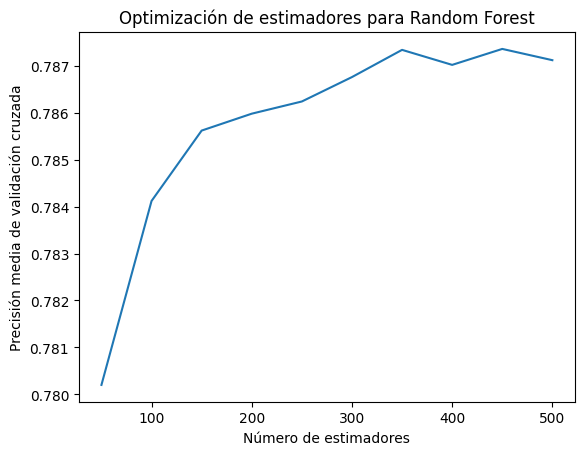

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


X_sample, _, y_sample, _ = train_test_split(X, y, train_size=50000, random_state=42)

n_estimators_range = range(50, 550, 50)
scores = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    score = cross_val_score(rf, X_sample, y_sample, cv=3, scoring='accuracy', n_jobs=-1).mean()
    scores.append(score)
    print(f"Estimadores: {n_estimators}, Score: {score}")

optimal_n_estimators = n_estimators_range[np.argmax(scores)]
print(f"Número óptimo de estimadores: {optimal_n_estimators}")

plt.plot(n_estimators_range, scores)
plt.xlabel('Número de estimadores')
plt.ylabel('Precisión media de validación cruzada')
plt.title('Optimización de estimadores para Random Forest')
plt.show()

## modelo acorde a ajuste de Estimadores

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=450, random_state=42)

## Busqueda de mejores HiperParametros

In [23]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit


param_grid = {
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#StratifiedShuffleSplit es mas optimo con dataset grandes manteniendo la division de clases por cada división
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,  # Usa todos los núcleos disponibles
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Puntuación en el conjunto de prueba:", test_score)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor puntuación: 0.8163359805694616
Puntuación en el conjunto de prueba: 0.8243484095531651


# Modelo ajustado con HiperParametros

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42, min_samples_leaf= 1, min_samples_split= 2)
model.fit(X_train, y_train)

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time= 6.0min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time= 6.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time= 6.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time= 2.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time= 2.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time= 6.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time= 2.9min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time= 2.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time= 6.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time= 2.9min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time= 2.9min


RandomForestClassifier(n_estimators=450, random_state=42)

In [25]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [26]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy Global: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report RF:')
print(class_report)


Accuracy Global: 82.43%
Confusion Matrix:
[[16862  1807    48     0]
 [ 2188 13272  1375     0]
 [   40  2101  8900    89]
 [    0     7   722   280]]
Classification Report RF:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     18717
           1       0.77      0.79      0.78     16835
           2       0.81      0.80      0.80     11130
           3       0.76      0.28      0.41      1009

    accuracy                           0.82     47691
   macro avg       0.81      0.69      0.72     47691
weighted avg       0.82      0.82      0.82     47691



[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time= 5.7min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time= 5.9min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time= 1.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time= 5.7min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time= 6.0min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time= 1.4min


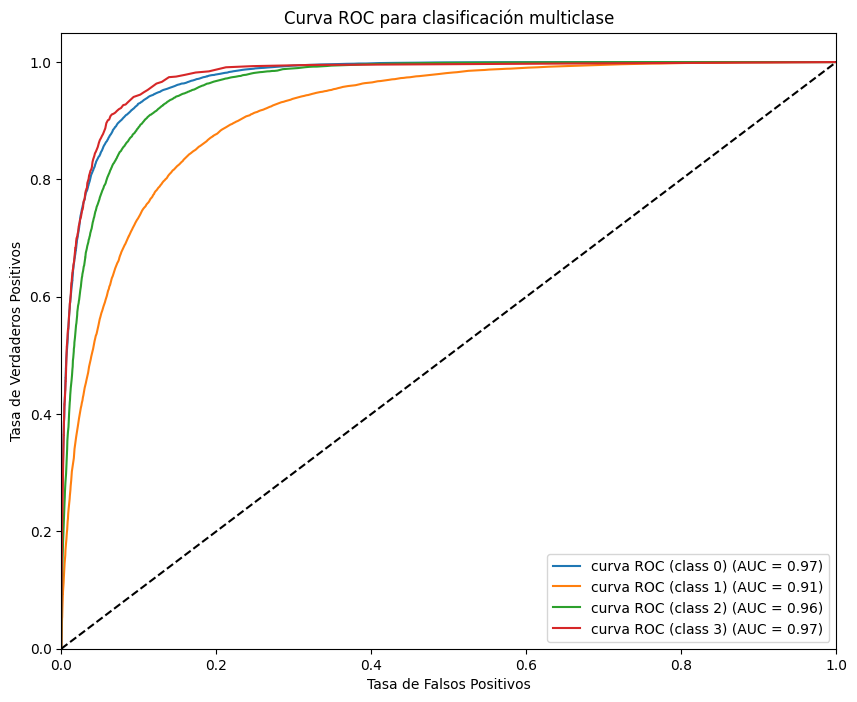

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=range(4))
y_pred_proba = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'curva ROC (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para clasificación multiclase')
plt.legend(loc="lower right")
plt.show()

## Importancia de Columnas


In [28]:
importances = model.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

                             Feature  Importance
29  alguien_hogar_empleado_o_similar    0.120603
30      alguien_hogar_cotiza_pension    0.118404
23                num_personas_hogar    0.093103
32                  sum_gastos_hogar    0.083864
31                sum_ingresos_hogar    0.078154
4                         cod_barrio    0.062005
28      max_nivel_educativo_en_hogar    0.043431
0                     edad_calculada    0.036315
10                     tip_mat_pisos    0.034042
7                         cod_comuna    0.033496
13            num_cuartos_exclusivos    0.032944
2                           cod_mpio    0.031035
24               num_habita_vivienda    0.027785
14         num_cuartos_unicos_dormir    0.020200
25                ind_tiene_internet    0.018475
20             tip_prepara_alimentos    0.017835
22                tip_energia_cocina    0.016145
8                       tip_vivienda    0.014461
12                     ind_tiene_gas    0.013674
9                   

Notese que la columna cod_dpto cuando se genera el modelo para un departamento en particulariedad no genera importancia y por lo tanto se podria eliminar, caso contrario cuando se mezclan los municipios del norte del Cauca y el Valle del Cauca
